#### DATA PROCESSING AND MANIPULATION


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

import random 
from random import sample
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [78]:
# CONVERTING APPLE HEALTH XML DATA TO CSV   
# %run -i "apple-health-data-parser" "export.xml"

In [79]:
df = pd.read_csv("activities.csv")
df.columns=df.columns.str.lower()
df

# selecting relevant columns
cols = ['activity id', 'activity date', 'activity name', 'activity type', 'elapsed time', 'moving time', 'distance',   
         'max heart rate', 'elevation gain', 'max speed', 'calories'
       ]
df = df[cols] 
df


,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories
0,11470038800,"22 May 2024, 08:19:26",Evening Walk,Walk,1266,1164.0,3.01,143.0,28.600000,3.080005,123.0
1,11470039023,"21 May 2024, 00:48:20",Morning Run,Run,1386,1374.0,3.05,201.0,40.599998,3.105999,157.0
2,11470243052,"21 May 2024, 21:53:08",Running,Run,658,647.0,1.59,198.0,0.000000,3.890000,76.0
3,11470243289,"19 May 2024, 07:07:07",Running,Run,1471,810.0,2.01,NaN,0.000000,4.702002,102.0
4,11470243423,"19 May 2024, 07:01:17",Running,Run,301,301.0,0.77,NaN,0.000000,3.345999,37.0
5,11470243536,"18 May 2024, 07:19:05",Running,Run,1719,1200.0,2.62,NaN,0.000000,3.376001,124.0
6,11470243862,"14 Apr 2024, 06:36:30",Como Park,Run,2633,1185.0,3.09,199.0,15.926480,3.438000,131.0
7,11470243993,"9 Jan 2024, 06:54:46",Como Park,Run,1765,1255.0,3.19,192.0,18.130556,5.061963,134.0
8,11470290443,"29 Dec 2023, 05:23:55",Como Park,Run,1110,919.0,2.31,187.0,3.189474,8.793333,90.0
9,11476534443,"23 May 2024, 06:10:14",Nike Run Club: First \nSpeed Run,Run,1617,810.0,2.27,155.0,28.000000,4.752002,118.0


In [80]:
df.dtypes


activity id         int64
activity date      object
activity name      object
activity type      object
elapsed time        int64
moving time       float64
distance          float64
max heart rate    float64
elevation gain    float64
max speed         float64
calories          float64
dtype: object

In [81]:
# breaking date into start time and date
df['activity_date'] = pd.to_datetime(df['activity date'],format='%d %b %Y, %H:%M:%S')
df['start_time'] = df['activity_date'].dt.time
df['start_date'] = df['activity_date'].dt.date
df['month'] = df['activity_date'].dt.month
df['year'] = df['activity_date'].dt.year
#df['year'] = (df['year']).astype(np.object) #change year from numeric to object
df['dayofyear'] = df['activity_date'].dt.dayofyear
df['dayofyear'] = pd.to_numeric(df['dayofyear'])
df['dayofweek'] = df['activity_date'].dt.dayofweek

#convert distance from object to numeric
df['distance'] = pd.to_numeric(df['distance'], errors = 'coerce')

#Create extra columns to create metrics which aren't in the dataset already
df['elapsed minutes'] = round(df['elapsed time']/60, 2)
df['km per hour'] = round(df['distance'] / (df['elapsed minutes'] / 60), 2)
df['avg pace'] = round(df['elapsed minutes'] / df['distance'], 2)

df


,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,...,activity_date,start_time,start_date,month,year,dayofyear,dayofweek,elapsed minutes,km per hour,avg pace
0,11470038800,"22 May 2024, 08:19:26",Evening Walk,Walk,1266,1164.0,3.01,143.0,28.600000,3.080005,...,2024-05-22 08:19:26,08:19:26,2024-05-22,5,2024,143,2,21.10,8.56,7.01
1,11470039023,"21 May 2024, 00:48:20",Morning Run,Run,1386,1374.0,3.05,201.0,40.599998,3.105999,...,2024-05-21 00:48:20,00:48:20,2024-05-21,5,2024,142,1,23.10,7.92,7.57
2,11470243052,"21 May 2024, 21:53:08",Running,Run,658,647.0,1.59,198.0,0.000000,3.890000,...,2024-05-21 21:53:08,21:53:08,2024-05-21,5,2024,142,1,10.97,8.70,6.90
3,11470243289,"19 May 2024, 07:07:07",Running,Run,1471,810.0,2.01,NaN,0.000000,4.702002,...,2024-05-19 07:07:07,07:07:07,2024-05-19,5,2024,140,6,24.52,4.92,12.20
4,11470243423,"19 May 2024, 07:01:17",Running,Run,301,301.0,0.77,NaN,0.000000,3.345999,...,2024-05-19 07:01:17,07:01:17,2024-05-19,5,2024,140,6,5.02,9.20,6.52
5,11470243536,"18 May 2024, 07:19:05",Running,Run,1719,1200.0,2.62,NaN,0.000000,3.376001,...,2024-05-18 07:19:05,07:19:05,2024-05-18,5,2024,139,5,28.65,5.49,10.94
6,11470243862,"14 Apr 2024, 06:36:30",Como Park,Run,2633,1185.0,3.09,199.0,15.926480,3.438000,...,2024-04-14 06:36:30,06:36:30,2024-04-14,4,2024,105,6,43.88,4.23,14.20
7,11470243993,"9 Jan 2024, 06:54:46",Como Park,Run,1765,1255.0,3.19,192.0,18.130556,5.061963,...,2024-01-09 06:54:46,06:54:46,2024-01-09,1,2024,9,1,29.42,6.51,9.22
8,11470290443,"29 Dec 2023, 05:23:55",Como Park,Run,1110,919.0,2.31,187.0,3.189474,8.793333,...,2023-12-29 05:23:55,05:23:55,2023-12-29,12,2023,363,4,18.50,7.49,8.01
9,11476534443,"23 May 2024, 06:10:14",Nike Run Club: First \nSpeed Run,Run,1617,810.0,2.27,155.0,28.000000,4.752002,...,2024-05-23 06:10:14,06:10:14,2024-05-23,5,2024,144,3,26.95,5.05,11.87


In [82]:
df['activity type'].value_counts()

activity type
Run     29
Walk     3
Name: count, dtype: int64

In [83]:
df.dtypes

activity id                 int64
activity date              object
activity name              object
activity type              object
elapsed time                int64
moving time               float64
distance                  float64
max heart rate            float64
elevation gain            float64
max speed                 float64
calories                  float64
activity_date      datetime64[ns]
start_time                 object
start_date                 object
month                       int32
year                        int32
dayofyear                   int32
dayofweek                   int32
elapsed minutes           float64
km per hour               float64
avg pace                  float64
dtype: object

In [84]:
df.describe().round(0)

,activity id,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories,activity_date,month,year,dayofyear,dayofweek,elapsed minutes,km per hour,avg pace
count,3.200000e+01,32.0,32.0,32.0,29.0,32.0,32.0,32.0,32,32.0,32.0,32.0,32.0,32.0,32.0,32.0
mean,1.151783e+10,1491.0,1239.0,3.0,184.0,26.0,4.0,136.0,2024-05-18 07:00:02.687500032,5.0,2024.0,150.0,4.0,25.0,7.0,9.0
min,1.147004e+10,201.0,134.0,1.0,138.0,0.0,2.0,21.0,2023-12-29 05:23:55,1.0,2023.0,9.0,1.0,3.0,4.0,6.0
25%,1.147028e+10,1080.0,859.0,2.0,174.0,13.0,3.0,99.0,2024-05-22 05:42:51.500000,5.0,2024.0,144.0,2.0,18.0,7.0,7.0
50%,1.149879e+10,1500.0,1192.0,3.0,191.0,27.0,4.0,128.0,2024-05-26 06:43:27,5.0,2024.0,148.0,4.0,25.0,8.0,8.0
75%,1.155171e+10,1810.0,1506.0,3.0,195.0,38.0,4.0,164.0,2024-06-02 00:23:13.750000128,6.0,2024.0,154.0,6.0,30.0,9.0,9.0
max,1.167799e+10,3425.0,3220.0,6.0,203.0,71.0,9.0,288.0,2024-06-18 03:19:44,12.0,2024.0,363.0,6.0,57.0,10.0,14.0
std,5.110653e+07,733.0,677.0,1.0,19.0,18.0,1.0,68.0,NaN,2.0,0.0,47.0,2.0,12.0,2.0,2.0


#### VISUALISATIONS (SEABORN)



,Day of Week,Distance
dayofweek,,
1,Tuesday,20.74
2,Wednesday,11.73
3,Thursday,6.82
4,Friday,7.51
5,Saturday,19.79
6,Sunday,26.55


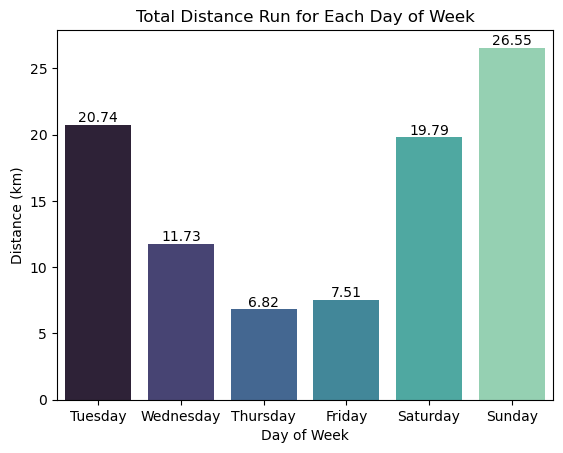

In [85]:
# TOTAL RUN DISTANCE FOR EACH DAY OF WEEK:

days = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df2 = df.groupby('dayofweek')['distance'].sum()
dist_by_day = pd.DataFrame({'Day of Week': days, 'Distance': df2})

ax = sns.barplot(dist_by_day, x='Day of Week', y='Distance', palette="mako")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(title="Total Distance Run for Each Day of Week", ylabel="Distance (km)")
sns.color_palette("mako", as_cmap=True)
dist_by_day

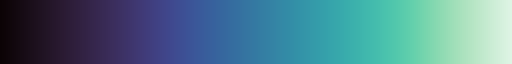

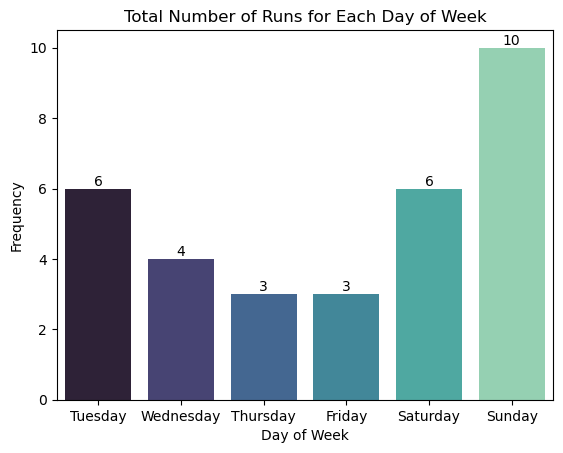

In [86]:
# FREQUENCY OF RUNS BY DAY OF WEEK
freq_by_day = pd.DataFrame({'Day of Week': days, 'Frequency': df.groupby('dayofweek')['dayofweek'].count()})

ax = sns.barplot(freq_by_day, x='Day of Week', y='Frequency', palette="mako")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(title="Total Number of Runs for Each Day of Week")
sns.color_palette("mako", as_cmap=True)


In [87]:
# TOTAL HOURS RUN PER WEEK

# how does datetime define a week?
df['Week'] = df['activity_date'].dt.isocalendar().week
week = ['1', '2', '3', '4', '5']
df3 = pd.DataFrame(round((df.groupby('Week')['elapsed minutes'].sum()/60), 1))

# removed outlier weeks with only one activity
hrs_per_week = pd.DataFrame({'Week': week, 'elapsed hours': df3['elapsed minutes']}).drop(index=[2,15,52])
ax = sns.barplot(hrs_per_week, y="Week", x='elapsed hours', palette='mako', orient='h')
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(title="Training Hours Per Week", xlabel="Elapsed Hours")
hrs_per_week




ValueError: array length 5 does not match index length 8

<Axes: xlabel='start_date', ylabel='distance'>

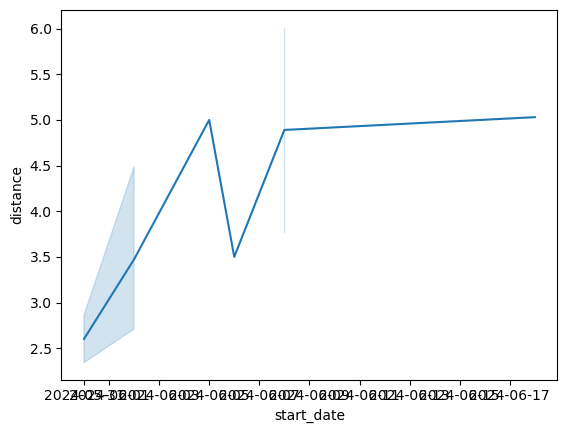

In [ ]:
# TOTAL DISTANCE RUN PER DAY

dist_activity = df.loc['2024-05-01':]
sns.lineplot(dist_activity, x="start_date", y='distance', markers=['o'],)



#### DATAFRAMES FOR EACH DISTANCE TYPE

In [ ]:
# 1KM DATAFRAME

runs_1k = df.query('1 <= distance < 2')
runs_1k = runs_1k.loc[runs_1k['activity type'] == 'Run']
runs_1k

,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,...,start_time,start_date,month,year,dayofyear,dayofweek,elapsed minutes,km per hour,avg pace,Week
2,11470243052,"21 May 2024, 21:53:08",Running,Run,658,647.0,1.59,198.0,0.0,3.890000,...,21:53:08,2024-05-21,May,2024,142,1,10.97,8.70,6.90,21
10,11476585894,"23 May 2024, 06:42:24",Afternoon Run,Run,374,374.0,1.05,203.0,10.6,4.338000,...,06:42:24,2024-05-23,May,2024,144,3,6.23,10.11,5.93,21
11,11490128286,"25 May 2024, 02:09:16",Lunch Run,Run,586,455.0,1.19,200.0,13.4,3.638000,...,02:09:16,2024-05-25,May,2024,146,5,9.77,7.31,8.21,21
17,11513656106,"28 May 2024, 00:58:41",Nike Run Club: 7 Weeks to Go - Recovery Run,Run,988,875.0,1.84,179.0,18.0,4.016667,...,00:58:41,2024-05-28,May,2024,149,1,16.47,6.70,8.95,22


In [ ]:
# 3KM DATAFRAME

# runs_3k = df.loc[(df['distance'] >= 3) & (df['distance'] <= 4)]
runs_3k = df.query('3 <= distance < 4').sort_values(by='start_date', ascending=True)
runs_3k = runs_3k.loc[runs_3k['activity type'] == 'Run'].drop(index=[6,7])
runs_3k

,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,...,start_time,start_date,month,year,dayofyear,dayofweek,elapsed minutes,km per hour,avg pace,Week
1,11470039023,"21 May 2024, 00:48:20",Morning Run,Run,1386,1374.0,3.05,201.0,40.599998,3.105999,...,00:48:20,2024-05-21,May,2024,142,1,23.10,7.92,7.57,21
14,11498777386,"26 May 2024, 06:30:01",Afternoon Run,Run,1452,1392.0,3.20,194.0,25.200001,7.267999,...,06:30:01,2024-05-26,May,2024,147,6,24.20,7.93,7.56,21
15,11498781598,"26 May 2024, 06:30:51",Nike Run Club: 8 Weeks to Go - Recovery Run,Run,1430,1321.0,3.06,194.0,33.000000,4.883333,...,06:30:51,2024-05-26,May,2024,147,6,23.83,7.70,7.79,21
24,11551802058,"2 Jun 2024, 00:57:07",Nike Run Club: 7 Weeks to Go - Recovery Run,Run,1753,1504.0,3.44,184.0,28.000000,3.583333,...,00:57:07,2024-06-02,June,2024,154,6,29.22,7.06,8.49,22
28,11585126344,"6 Jun 2024, 04:19:42",Nike Run Club: 6 Weeks to Go - Recovery Run,Run,1616,1510.0,3.50,190.0,33.000000,4.040000,...,04:19:42,2024-06-06,June,2024,158,3,26.93,7.80,7.69,23
30,11599836517,"8 Jun 2024, 02:08:19",Lunch Run,Run,1617,1581.0,3.76,186.0,40.800003,3.402002,...,02:08:19,2024-06-08,June,2024,160,5,26.95,8.37,7.17,23


In [ ]:
# 5 KM DATAFRAME
runs_5k = df.query('5 <= distance < 6').sort_values(by='start_date', ascending=True)
runs_5k = runs_5k.loc[runs_5k['activity type'] == 'Run']
runs_5k


,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,...,start_time,start_date,month,year,dayofyear,dayofweek,elapsed minutes,km per hour,avg pace,Week
23,11551681161,"2 Jun 2024, 00:11:56",Nike Run Club: 7 Weeks to Go - Long Run,Run,2485,2258.0,5.03,192.0,58.0,3.900000,...,00:11:56,2024-06-02,June,2024,154,6,41.42,7.29,8.23,22
27,11576211014,"5 Jun 2024, 01:03:15",Nike Run Club: 6 Weeks to Go - Recovery Run,Run,2344,2219.0,5.00,188.0,44.0,3.553333,...,01:03:15,2024-06-05,June,2024,157,2,39.07,7.68,7.81,23
31,11677993982,"18 Jun 2024, 03:19:44",Nike Run Club: 5 Weeks to Go - Recovery Run,Run,1944,1941.0,5.03,202.0,46.0,3.955957,...,03:19:44,2024-06-18,June,2024,170,1,32.40,9.31,6.44,25


#### DATAFRAMES BY RUN TYPE (RECOVERY, SPEED, LONGRUN) 

In [ ]:
# DATAFRAMES BY RUN TYPE
recovery_runs = df[df["activity name"].str.contains("Recovery")]
speed_runs = df[df["activity name"].str.contains("Speed")]
long_runs = df[df["activity name"].str.contains("Long")]
zone2_runs = df[(df["max heart rate"] <= 170) & (df["activity type"] == 'Run')]
zone2_runs


,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,...,start_time,start_date,month,year,dayofyear,dayofweek,elapsed minutes,km per hour,avg pace,Week
9,11476534443,"23 May 2024, 06:10:14",Nike Run Club: First \nSpeed Run,Run,1617,810.0,2.27,155.0,28.0,4.752002,...,06:10:14,2024-05-23,May,2024,144,3,26.95,5.05,11.87,21
25,11559938586,"2 Jun 2024, 23:41:16",Nike Run Club: A New Run,Run,1529,1500.0,2.85,169.0,26.0,2.866016,...,23:41:16,2024-06-02,June,2024,154,6,25.48,6.71,8.94,22


In [ ]:
# CREATING A NEW COLUMN THAT LABELS RUN TYPE

def run_type(df):
    # Initialize the 'run type' column with a default value (optional)
    df['run type'] = 'unknown'
    
    for i, name in enumerate(df['activity name']):
        if "Recovery" in name:
            df.at[i, 'run type'] = 'recovery run'
        elif "Speed" in name:
            df.at[i, 'run type'] = 'speed run'
        elif "Long" in name:
            df.at[i, 'run type'] = 'long run'
        else:
            df.at[i, 'run type'] = 'recovery run'
    
    for i, heart_rate in enumerate(df['max heart rate']):
        if heart_rate < 170:
            df.at[i, 'run type'] = 'zone 2 run'
    
    return df

df = run_type(df)
df
# df.to_csv('updated_activities.csv')
    

,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,...,start_date,month,year,dayofyear,dayofweek,elapsed minutes,km per hour,avg pace,Week,run type
0,11470038800,"22 May 2024, 08:19:26",Evening Walk,Walk,1266,1164.0,3.01,143.000000,28.600000,3.080005,...,2024-05-22,5,2024,143,2,21.10,8.56,7.01,21,zone 2 run
1,11470039023,"21 May 2024, 00:48:20",Morning Run,Run,1386,1374.0,3.05,201.000000,40.599998,3.105999,...,2024-05-21,5,2024,142,1,23.10,7.92,7.57,21,recovery run
2,11470243052,"21 May 2024, 21:53:08",Running,Run,658,647.0,1.59,198.000000,0.000000,3.890000,...,2024-05-21,5,2024,142,1,10.97,8.70,6.90,21,recovery run
3,11470243289,"19 May 2024, 07:07:07",Running,Run,1471,810.0,2.01,183.586207,0.000000,4.702002,...,2024-05-19,5,2024,140,6,24.52,4.92,12.20,20,recovery run
4,11470243423,"19 May 2024, 07:01:17",Running,Run,301,301.0,0.77,183.586207,0.000000,3.345999,...,2024-05-19,5,2024,140,6,5.02,9.20,6.52,20,recovery run
5,11470243536,"18 May 2024, 07:19:05",Running,Run,1719,1200.0,2.62,183.586207,0.000000,3.376001,...,2024-05-18,5,2024,139,5,28.65,5.49,10.94,20,recovery run
6,11470243862,"14 Apr 2024, 06:36:30",Como Park,Run,2633,1185.0,3.09,199.000000,15.926480,3.438000,...,2024-04-14,4,2024,105,6,43.88,4.23,14.20,15,recovery run
7,11470243993,"9 Jan 2024, 06:54:46",Como Park,Run,1765,1255.0,3.19,192.000000,18.130556,5.061963,...,2024-01-09,1,2024,9,1,29.42,6.51,9.22,2,recovery run
8,11470290443,"29 Dec 2023, 05:23:55",Como Park,Run,1110,919.0,2.31,187.000000,3.189474,8.793333,...,2023-12-29,12,2023,363,4,18.50,7.49,8.01,52,recovery run
9,11476534443,"23 May 2024, 06:10:14",Nike Run Club: First \nSpeed Run,Run,1617,810.0,2.27,155.000000,28.000000,4.752002,...,2024-05-23,5,2024,144,3,26.95,5.05,11.87,21,zone 2 run


#### VISUALISATIONS PLOTLY

In [ ]:
# TOTAL RUN DISTANCE FOR EACH DAY OF WEEK:
import plotly.express as px
fig = px.bar(dist_by_day, 
             x='Day of Week', 
             y='Distance', 
             text_auto='.2s', 
             title= "Total Distance Run For Each Day of Week",
             )
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False,
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  yaxis_title='Distance (km)',
                  )
fig.show()


In [ ]:
# FREQUENCY OF RUNS BY DAY OF WEEK

fig = px.bar(freq_by_day, x='Day of Week', y='Frequency', text='Frequency', title= "Total Frequency of Runs Each Day of Week")
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False,
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  yaxis_title='Distance (km)',
                  )
fig.show()

In [ ]:
# TOTAL HOURS RUN PER WEEK

fig = px.bar(hrs_per_week, x='elapsed hours', y='Week', text='elapsed hours', title= "Training Hours Per Week", orientation='h')
fig.update_traces(textfont_size=12, 
                  textangle=0, 
                  textposition="outside", 
                  cliponaxis=False,
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  )
fig.update_yaxes(autorange='reversed')
fig.show()


In [ ]:
# AVG PACE OF 1KM RUNS OVERTIME

fig = px.line(runs_1k, 
              x='start_date',
              y='avg pace', 
              markers=True, 
              title="Avg Pace of 1km Runs Overtime",
              )
fig.update_traces(line_color="rgb(230, 81, 0)",
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  xaxis_title='Date',
                  )

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

In [ ]:
# AVG PACE OF 3KM RUNS OVERTIME

fig = px.line(runs_3k, 
              x='start_date', 
              y='avg pace', 
              markers=True, 
              title="Avg Pace of 3km Runs Overtime",
              )
fig.update_traces(line_color="rgb(230, 81, 0)",
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  xaxis_title='Date',
                  )

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()


In [ ]:
# AVG PACE OF 5KM RUNS OVERTIME

fig = px.line(runs_5k, 
              x='start_date', 
              y='avg pace', 
              markers=True, 
              title="Avg Pace of 5km Runs Overtime",
              )

fig.update_traces(line_color="rgb(230, 81, 0)",
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  xaxis_title='Date',
                  )

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

In [ ]:
# AVERAGE PACE OVERTIME (FOR ALL RUNS)

df = df.sort_values(by='start_date', ascending=True).drop(index=[6,7,8])
fig = px.line(df, x='start_date', y='avg pace', markers=True, title="Average Pace Overtime")

fig.update_traces(line_color="rgb(230, 81, 0)",
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  xaxis_title='Date',
                  )

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

In [ ]:
# MAX HEART RATE OVERTIME

fig = px.line(df, 
              x='start_date', 
              y='max heart rate', 
              markers=True, 
              title='Max Heart Rate Overtime',
              )

fig.update_traces(line_color="rgb(230, 81, 0)",
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  xaxis_title='Date',
                  )

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

In [ ]:
# DISTANCE PER WEEK?
dist_per_week = pd.DataFrame(df.groupby('Week')['distance'].sum())
fig = px.line(dist_per_week, y='distance', markers=True, title='Distance Per Week')

fig.update_traces(line_color="rgb(230, 81, 0)",
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  yaxis_title='Distance (km)'
                  )

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()
dist_per_week

,distance
Week,
20,5.40
21,25.15
22,30.69
23,18.28
25,5.03


In [ ]:
df

,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,...,start_time,start_date,month,year,dayofyear,dayofweek,elapsed minutes,km per hour,avg pace,Week
0,11470038800,"22 May 2024, 08:19:26",Evening Walk,Walk,1266,1164.0,3.01,143.000000,28.600000,3.080005,...,08:19:26,2024-05-22,5,2024,143,2,21.10,8.56,7.01,21
1,11470039023,"21 May 2024, 00:48:20",Morning Run,Run,1386,1374.0,3.05,201.000000,40.599998,3.105999,...,00:48:20,2024-05-21,5,2024,142,1,23.10,7.92,7.57,21
2,11470243052,"21 May 2024, 21:53:08",Running,Run,658,647.0,1.59,198.000000,0.000000,3.890000,...,21:53:08,2024-05-21,5,2024,142,1,10.97,8.70,6.90,21
3,11470243289,"19 May 2024, 07:07:07",Running,Run,1471,810.0,2.01,183.586207,0.000000,4.702002,...,07:07:07,2024-05-19,5,2024,140,6,24.52,4.92,12.20,20
4,11470243423,"19 May 2024, 07:01:17",Running,Run,301,301.0,0.77,183.586207,0.000000,3.345999,...,07:01:17,2024-05-19,5,2024,140,6,5.02,9.20,6.52,20
5,11470243536,"18 May 2024, 07:19:05",Running,Run,1719,1200.0,2.62,183.586207,0.000000,3.376001,...,07:19:05,2024-05-18,5,2024,139,5,28.65,5.49,10.94,20
6,11470243862,"14 Apr 2024, 06:36:30",Como Park,Run,2633,1185.0,3.09,199.000000,15.926480,3.438000,...,06:36:30,2024-04-14,4,2024,105,6,43.88,4.23,14.20,15
7,11470243993,"9 Jan 2024, 06:54:46",Como Park,Run,1765,1255.0,3.19,192.000000,18.130556,5.061963,...,06:54:46,2024-01-09,1,2024,9,1,29.42,6.51,9.22,2
8,11470290443,"29 Dec 2023, 05:23:55",Como Park,Run,1110,919.0,2.31,187.000000,3.189474,8.793333,...,05:23:55,2023-12-29,12,2023,363,4,18.50,7.49,8.01,52
9,11476534443,"23 May 2024, 06:10:14",Nike Run Club: First \nSpeed Run,Run,1617,810.0,2.27,155.000000,28.000000,4.752002,...,06:10:14,2024-05-23,5,2024,144,3,26.95,5.05,11.87,21


In [ ]:
# PERCENTAGE OF TIME SPENT ON DIFFERENT RUN TYPES

df = run_type(df)
run_type_count = df.groupby('run type')['run type'].count()
run_type_percent = pd.DataFrame({'Run Type': ['long run', 'recovery run', 'speed run', 'zone 2 run'], 
                                 'Percentage': (run_type_count/df['run type'].count()) * 100})
run_type_percent = run_type_percent.sort_values(by="Percentage", ascending=False)

fig = px.pie(run_type_percent, 
             values='Percentage', 
             names='Run Type', 
             hole=.4,
             title="Type of Run",
             color='Percentage',
             color_discrete_sequence= px.colors.sequential.OrRd_r,
             
             )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  )
fig.show()
run_type_count
run_type_percent


,Run Type,Percentage
run type,,
recovery run,recovery run,75.000
zone 2 run,zone 2 run,15.625
long run,long run,6.250
speed run,speed run,3.125


In [114]:
# VO2 MAX OVERTIME

vo2_df = pd.read_csv('Health data/VO2Max.csv')
vo2_df['startDate'] = pd.to_datetime(vo2_df['startDate'],format='mixed')

fig = px.line(vo2_df, x='startDate', y='value', markers=True, title="VO2 Max Overtime")

fig.update_traces(line_color="rgb(230, 81, 0)",
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)'
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  yaxis_title='Distance (km)'
                  )

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()
print(df['start_date'][0])


2024-05-22


In [119]:
# SUBPLOTS FOR AVG PACE, MAX HEART RATE AND VO2 MAX

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1 ,shared_xaxes=True,)

# df = df.sort_values(by='start_date', ascending=True).drop(index=[8])

fig.append_trace(go.Scatter(
    x=df['start_date'],
    y=df['avg pace'],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=df['start_date'],
    y=df['max heart rate'],
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=vo2_df['startDate'],
    y=vo2_df['value'],
    
), row=3, col=1)

fig.update_traces(line_color="rgb(230, 81, 0)",
                  marker_color="rgb(230, 81, 0)",
                  marker_line_color='rgb(230, 81, 0)',           
                  )

fig.update_layout(paper_bgcolor='rgb(12, 29, 42)', 
                  plot_bgcolor='rgb(12, 29, 42)', 
                  font=dict(color='white'),
                  title_x=0.5,
                  showlegend=False,
                  
                  )

fig['layout']['yaxis']['title']='Avg Pace'
fig['layout']['yaxis2']['title']='Max Heart Rate'
fig['layout']['yaxis3']['title']='VO2 Max'

fig.update_xaxes(showgrid=False, zeroline=False, range=['2024-05-12', '2024-07-10'])
fig.update_yaxes(showgrid=False, zeroline=False)
fig.update_layout(height=600, width=500, title_text="Avg Pace, Max Heart Rate & VO2 Max Overtime")
fig.show()

#### PREDICTING PERFORMANCE (LINEAR REGRESSION WITH TIME SERIES)


The presence of missing values in the data is a major problem since most forecasting algorithms require the time series to be complete in order to train a model.

In [ ]:
# IMPUTING AVG VALUE FOR NAN MAX HEART RATE
# NaN values occur because I forgot to wear my Apple Watch for the run

df['max heart rate'].fillna(df['max heart rate'].mean() , inplace=True)

In [ ]:
# CREATING THE TRAINING, VALIDATION AND TEST SETS

# df = df.drop(index=[0,19,20]) # removing the walking activities
df['activity type'].value_counts()
train = df.sample(n=24)
# validation = df.sample(n=3)
test = df.sample(n=6)

In [ ]:
x_cols = ['moving time', 'distance', 'max heart rate', 'max speed'] #'month', 'start_date'
y_col = 'avg pace'

x_train = train[x_cols]
y_train = train[y_col]
x_test = test[x_cols]
y_test = test[y_col]

# x_test = test[]

time_series = ['start_date', 'avg pace']
avg_pace = train[time_series].sort_values(by='start_date', ascending=True)
avg_pace['Time'] = np.arange(len(avg_pace.index))
avg_pace


,start_date,avg pace,Time
8,2023-12-29,8.01,0
7,2024-01-09,9.22,1
6,2024-04-14,14.20,2
3,2024-05-19,12.20,3
4,2024-05-19,6.52,4
2,2024-05-21,6.90,5
0,2024-05-22,7.01,6
9,2024-05-23,11.87,7
11,2024-05-25,8.21,8
12,2024-05-25,8.24,9


In [ ]:
x_train


,moving time,distance,max heart rate,max speed
6,1185.0,3.09,199.000000,3.438000
7,1255.0,3.19,192.000000,5.061963
16,190.0,0.53,193.000000,3.348000
29,2452.0,6.02,195.000000,4.433333
14,1392.0,3.20,194.000000,7.267999
3,810.0,2.01,183.586207,4.702002
17,875.0,1.84,179.000000,4.016667
31,1941.0,5.03,202.000000,3.955957
24,1504.0,3.44,184.000000,3.583333
30,1581.0,3.76,186.000000,3.402002


In [ ]:
y_train.head(10)

6     14.20
7      9.22
16     6.32
29     6.99
14     7.56
3     12.20
17     8.95
31     6.44
24     8.49
30     7.17
Name: avg pace, dtype: float64

In [ ]:
lm = LinearRegression()
# x = avg_pace.loc[:, ['Time']]  # features
# y = avg_pace.loc[:, 'avg pace']  # target

x = avg_pace['Time'].values.reshape(-1, 1)
y = avg_pace['avg pace']
lm.fit(x, y)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE for the full dataset', mse)

ValueError: Expected 2D array, got 1D array instead:
array=[1041. 2219.  647. 1392. 1001. 1655.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_pred = pd.Series(lm.predict(x), index=x.index)

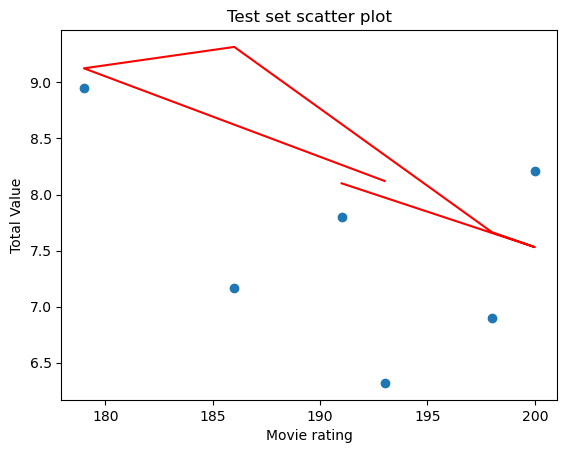

,moving time,distance,max heart rate,max speed
21,901.0,2.34,171.000000,4.069995
7,1255.0,3.19,192.000000,5.061963
15,1321.0,3.06,194.000000,4.883333
25,1500.0,2.85,169.000000,2.866016
8,919.0,2.31,187.000000,8.793333
12,1655.0,4.00,195.000000,3.450000
5,1200.0,2.62,188.925926,3.376001
11,455.0,1.19,200.000000,3.638000
2,647.0,1.59,198.000000,3.890000
13,1001.0,2.20,191.000000,3.943994


In [ ]:
# Plot the scatter plot and the line of regression
plt.scatter(x_test['max heart rate'], y_test)
plt.plot(x_test['max heart rate'], y_pred, color='red')
plt.title('Test set scatter plot')
plt.xlabel('Movie rating')
plt.ylabel('Total Value')


plt.show()
x_train

In [ ]:

ax = y.plot(label='Actual')
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Running Pace');

NameError: name 'y' is not defined